In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import os

In [2]:
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm
        #fm._rebuild()
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [12]:
path = '../../../data/카드'

train = pd.read_csv(os.path.join(path, 'train.csv'), index_col=0)
test = pd.read_csv(os.path.join(path, 'test.csv'), index_col=0)
sub = pd.read_csv(os.path.join(path, 'sample_submission.csv'), index_col=0)

In [13]:
train.shape, test.shape, sub.shape

((26457, 19), (10000, 18), (10000, 3))

* gender: 성별


* car: 차량 소유 여부


* reality: 부동산 소유 여부


* child_num: 자녀 수


* income_total: 연간 소득


* income_type: 소득 분류   
    ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']



* edu_type: 교육 수준   
    ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']



* family_type: 결혼 여부   
    ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']



* house_type: 생활 방식   
    ['Municipal apartment', 'House / apartment', 'With parents',   
    'Co-op apartment', 'Rented apartment', 'Office apartment']



* DAYS_BIRTH: 출생일   
    데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미



* DAYS_EMPLOYED: 업무 시작일   
    데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미   
    양수 값은 고용되지 않은 상태를 의미함



* FLAG_MOBIL: 핸드폰 소유 여부


* work_phone: 업무용 전화 소유 여부


* phone: 전화 소유 여부


* email: 이메일 소유 여부


* occyp_type: 직업 유형													


* family_size: 가족 규모


* begin_month: 신용카드 발급 월   
    데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미







* credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도   
    => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [18]:
# 중복 확인
train.duplicated().sum()

1634

<AxesSubplot:xlabel='gender', ylabel='count'>

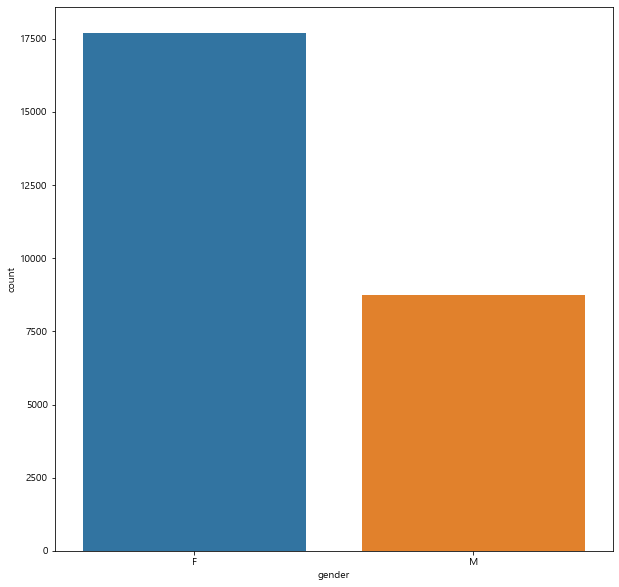

In [22]:
# gender
plt.figure(figsize=(10,10))
sns.countplot(x = train['gender'])

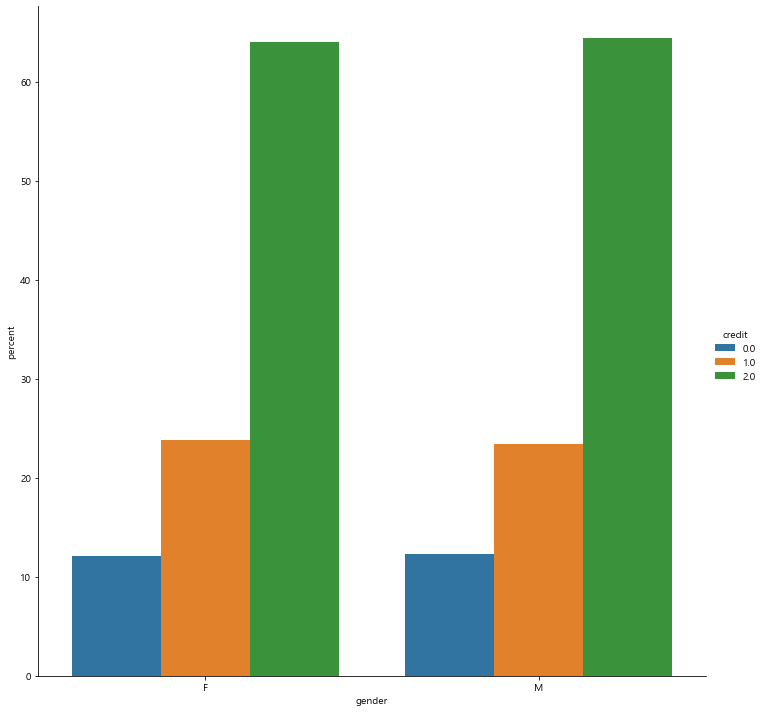

In [48]:
df = (train.groupby('gender')['credit'].value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot,'data'), x='gender', y='percent',hue='credit',kind='bar', height=10 , aspect =1))

<AxesSubplot:xlabel='car', ylabel='count'>

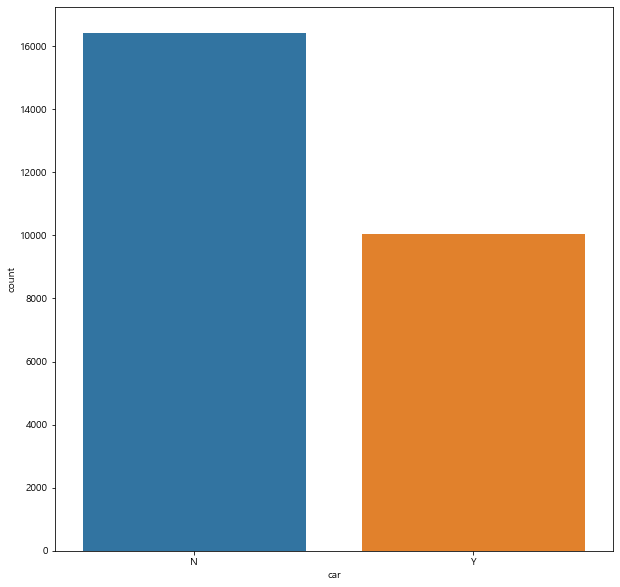

In [36]:
# car
plt.figure(figsize=(10,10))
sns.countplot(data=train, x='car')

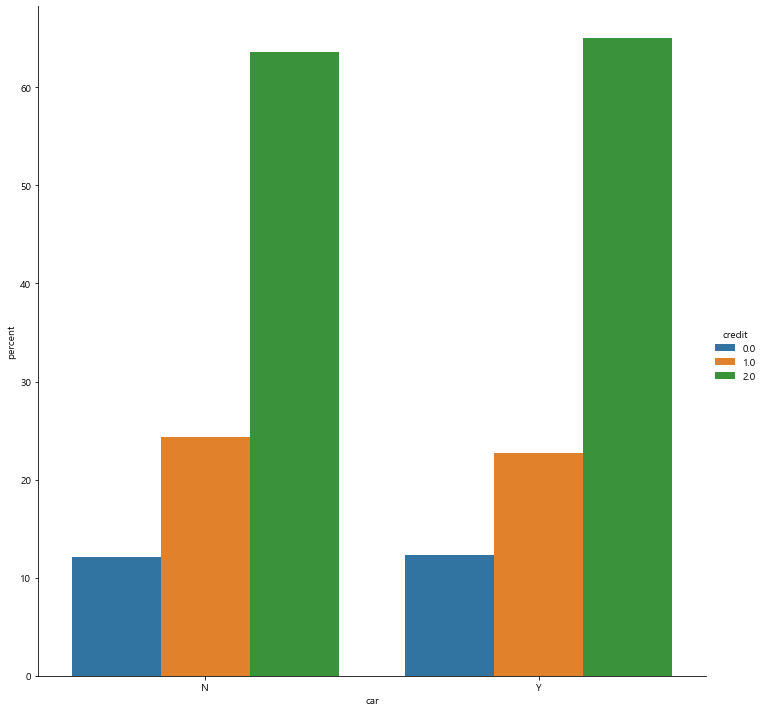

In [49]:
df = (train.groupby('car')['credit'].value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot,'data'), x='car', y='percent',hue='credit',kind='bar', height=10 , aspect =1))

<AxesSubplot:xlabel='reality', ylabel='count'>

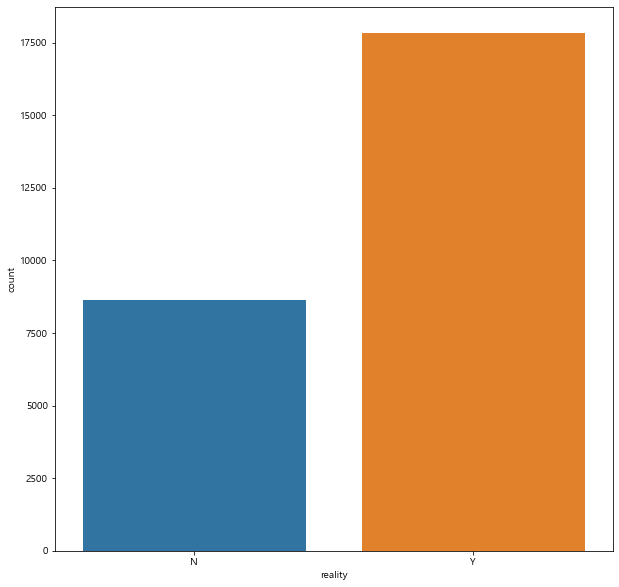

In [51]:
# reality
plt.figure(figsize=(10, 10))
sns.countplot(data=train, x='reality')

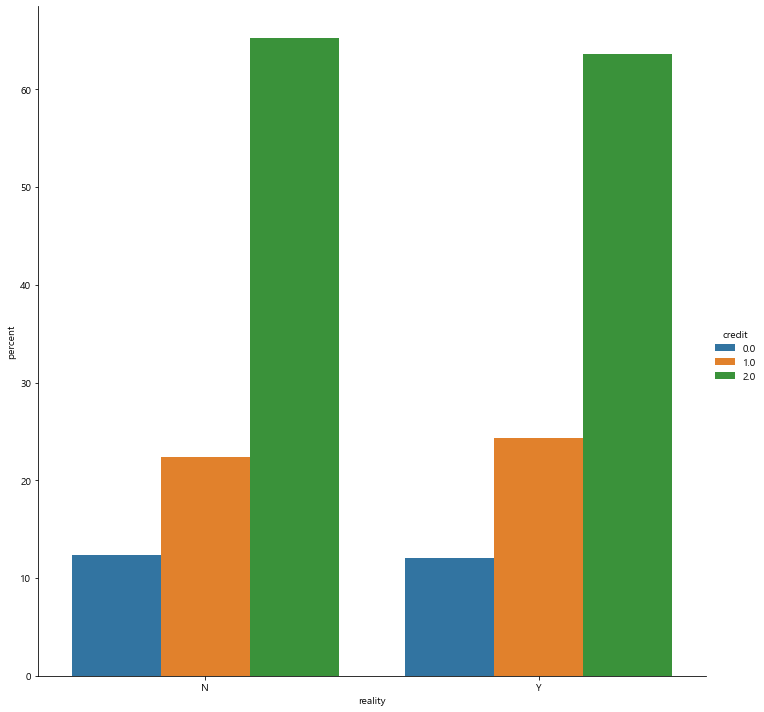

In [52]:
df = (train.groupby('reality')['credit'].value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot,'data'), x='reality', y='percent',hue='credit',kind='bar', height=10 , aspect =1))

<AxesSubplot:ylabel='child_num'>

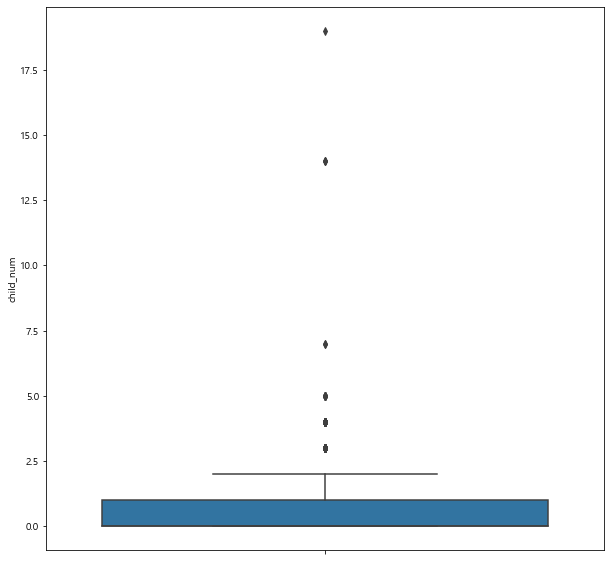

In [56]:
# child_num
plt.figure(figsize=(10, 10))
sns.boxplot(data=train, y='child_num')

In [60]:
train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64